# Customer Churn Telecom

Lorem Ipsum

In [142]:
# Imports da biblioteca
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency

In [8]:
# Import dos dados
df = pd.read_csv("projeto4_telecom_treino.csv", index_col=0)

In [3]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,AZ,192,area_code_415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,no
3330,WV,68,area_code_415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,no
3331,RI,28,area_code_510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,no
3332,CT,184,area_code_510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Análise Exploratória de Dados

Essa etapa é 

## Pergunta de negócio: Onde estão a maior parte dos clientes?

In [51]:
clientes_por_estado = df['state'].value_counts()

fig = px.choropleth(locations=clientes_por_estado.index, 
                    locationmode="USA-states", 
                    scope="usa",
                    color=clientes_por_estado.values,
                    labels = 'Quantidade de clientes',
                    color_continuous_scale="Viridis_r")

fig.update_layout(title_text = 'Quantidade de clientes por estado',
                  title_font_family="Gill Sans",
                  title_font_size = 22,
                  title_font_color="black",  
                  title_x=0.5,
                  coloraxis_colorbar=dict(title='Quantidade de clientes',
                                          titleside='right',
                                          titlefont= dict(size = 14))
                  )

fig.show()

                    

## Insight: Estados com mais clientes

Os estados com mais clientes são West Virginia, seguido de Minnesota e New York.

## Pergunta de negócio: Quantos clientes tem plano internacional?

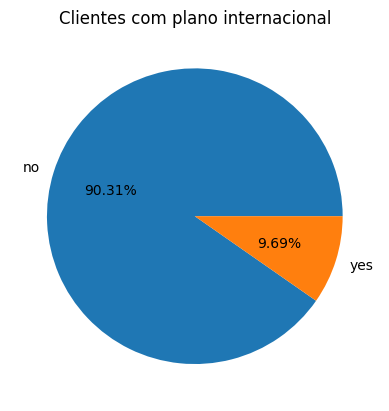

In [132]:
plano_internacional = df['international_plan'].value_counts()

plt.pie(plano_internacional.values, labels = plano_internacional.index, autopct='%1.2f%%')
plt.title('Clientes com plano internacional');

Menos de 10% dos clientes usam plano internacional.

## Pergunta de negócio: Existe diferença de Churn para clientes com plano internacional?

In [115]:
# Tabela cruzada churn x plano internacional
tabela_cruzada = pd.crosstab(df['churn'], df['international_plan'])
tabela_cruzada

international_plan,no,yes
churn,,
no,2664,186
yes,346,137


In [140]:
# Em porcentagem
tabela_cruzada_pct = tabela_cruzada / tabela_cruzada.sum()
tabela_cruzada_pct.T

churn,no,yes
international_plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


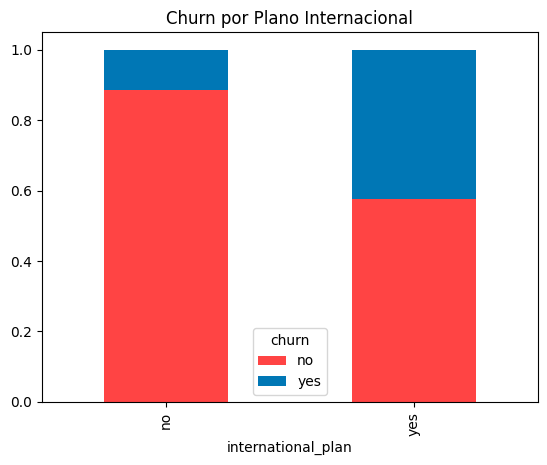

In [129]:
## Gráfico
tabela_cruzada_pct.T.plot(kind = 'bar', stacked = True, color = ['#FF4444', '#0077B5'])
plt.title('Churn por Plano Internacional');

## Insight: Clientes com plano internacional proporcionalmente cancelam mais

Apenas cerca de 11% dos clientes sem plano internacional cancelam. Já nos clientes com plano internacional esse número é mais de 40%. Mais tarde checaremos a importância dessa variável no modelo de Machine Learning.

## Pergunta de negócio: Quantos clientes tem plano internacional?

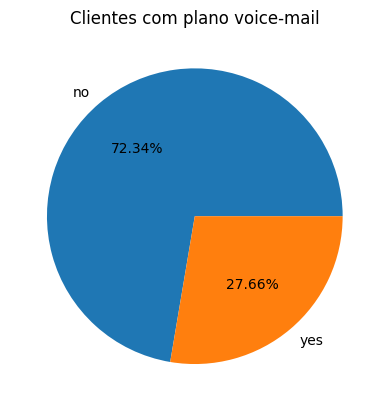

In [133]:
plano_voice_mail = df['voice_mail_plan'].value_counts()

plt.pie(plano_voice_mail.values, labels = plano_voice_mail.index, autopct='%1.2f%%')
plt.title('Clientes com plano voice-mail');

## Pergunta de negócio: Existe diferença de Churn para clientes com plano voice-mail?

In [139]:
# Tabela cruzada churn x plano internacional
tabela_cruzada2 = pd.crosstab(df['churn'], df['voice_mail_plan'])
tabela_cruzada2

# Em porcentagem
tabela_cruzada_pct2 = tabela_cruzada2 / tabela_cruzada2.sum()
tabela_cruzada_pct2.T

churn,no,yes
voice_mail_plan,,
no,0.832849,0.167151
yes,0.913232,0.086768


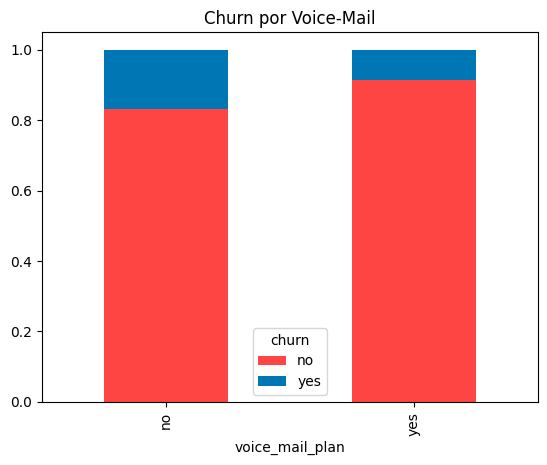

In [137]:
## Gráfico
tabela_cruzada_pct2.T.plot(kind = 'bar', stacked = True, color = ['#FF4444', '#0077B5'])
plt.title('Churn por Voice-Mail');

## Validação estatística: Teste Chi-Quadrado para Independência de Variáveis Categóricas

Apenas cerca de 9% dos clientes sem plano voice-mail cancelam. Já nos clientes com plano voice-mail esse número é de quase 17%. Mas será essa diferença estatisticamente significativa?

In [143]:
# Rodando teste Chi-Quadrado
chi2, p, dof, expected = chi2_contingency(tabela_cruzada2)

# Imrpime os resultados
print('Chi-squared statistic: {:.2f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))
print('Expected frequencies:\n', expected)

Chi-squared statistic: 34.13
p-value: 0.0000
Degrees of freedom: 1
Expected frequencies:
 [[2061.61116112  788.38883888]
 [ 349.38883888  133.61116112]]


## Insight: A diferença de Churn é significativa para clientes com plano Voice-Mail

O teste Chi Quadrado revelou que a diferença de Churn é estatísticamente significativa para clientes com plano Voice-Mail. Mais tarde será verificada a importância dessa variável no Modelo de Machine Learning.

## Análise Univariada das Variáveis Numéricas

## Pergunta de negócio:

## Pergunta de negócio: Qual a média de Customer Service Calls para Clientes que cancelam?

## Checando valores missing

In [6]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Não há valores missing. Podemos prosseguir com o pré-processamento.